# Getting started with HTRC Extracted Features

This tutorial will get you up-and-running with the HTRC Extracted Features dataset. Learn more about the data: https://wiki.htrc.illinois.edu/x/GoA5Ag

The code and instructions used in this notebook combine elements from a Programming Historian lesson,"Text Mining in Python through the HTRC Feature Reader" (https://programminghistorian.org/en/lessons/text-mining-with-extracted-features) and the Berkeley Data Science Module, "Library-HTRC" (https://github.com/ds-modules/Library-HTRC).


## Set-up and reading in files

To get started, we need to import modules we'll use throughout this notebook.

In [74]:
from htrc_features import FeatureReader
import matplotlib
import matplotlib.pyplot as plt
import os
import glob
import numpy 
import pandas 

Extracted Featuers files are originally formatted in JSON notation and compressed; you'll notice the file format is '.json.bz2'. The FeatureReader library is able to work with the files in that format. 

The FeatureReader object is the interface for loading the dataset files and making sense of them, and it returns a Volume object for each file. A Volume is a representation of a single iteam in the HathiTrust, for example a book or other textual work. From the Volume, access features about a work. To drill down to the features derived from individual pages, use the Page object.

Next we'll need to get the FeatureReader ready to use by pointing it to the file path to the sample Extracted Features files we are using in this notebook. The files are in directory called 'data', in which they are further divided into two directories: '1970' and '1930'. We refer to these directories as "decade" in the code below, as they allow us to compare presidential speeches from the 1930s to the 1970s. 
 
With fr = FeatureReader(paths), the FeatureReader is initialized, meaning it is ready to use. An initialized FeatureReader is holding references to the file paths that we gave it, and will load them into Volume objects when asked.

In [116]:
#try changin
#paths = [os.path.join('1970', 'sample-file1.json.bz2'), os.path.join('data_cp', 'sample-file2.json.bz2')]
decade = '1970'
#suffix = '.json.bz2'
#paths = ['1970/' + path for path in directory if path.endswith(suffix)]
paths = glob.glob(decade+'/*.json.bz2')
fr = FeatureReader(paths)

Let's see what titles have been loaded as Volumes. Because these are serials, they have the same basic title.

In [117]:
for vol in fr.volumes():
    print(vol.title)

Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.
Public papers of the presidents of the United States.


## File and page structure

We can call just one file at a time in order to examine its contents.

In [118]:
vol = fr.first()
vol

We can also call the URL for the volume and click it to find the corresponding item in the HathiTrust Digital Library (HTDL). These volumes are in the public domain, so we will find that they are available for "Full View" in the HTDL. If they were still under copyright, we would be taken to a "Limited View" page; the Extracted Featues dataset includes a snapshot of 15.7 million volumes from the HTDL and is agnostic to rights status as they represent data about the volume. 

In [120]:
print(vol.handle_url)

http://hdl.handle.net/2027/mdp.49015002203215


Let's see what other metadata elements are available to you for each volume in its corresponding Extracted Features file. Put your cursor between the period and the end parenthesis, and press tab. You can choose from the dropdown list. Then run the cell.

In [121]:
#Put your cursor between the period . and the end parenthesis ) and press tab. You can choose from the dropdown list.
print(vol.)

SyntaxError: invalid syntax (<ipython-input-121-d14f8bfdf9d9>, line 2)

It's time to access the first features of vol: a table of total words for every single page. These can be accessed simply by calling vol.tokens_per_page().

In [122]:
tokens = vol.tokens_per_page()
# Show just the first few rows, so we can look at what it looks like
tokens.head()

,count
page,
1,9
2,0
3,0
4,0
5,33


This is a straightforward table of information, similar to what you would see in Excel or Google Spreadsheets. Listed in the table are page numbers and the count of words on each page. 

With only two dimensions, it is trivial to plot the number of words per page. The table structure holding the data has a plot method for data graphics. Without extra arguments, tokens.plot() will assume that you want a line chart with the page on the x-axis and word count on the y-axis.

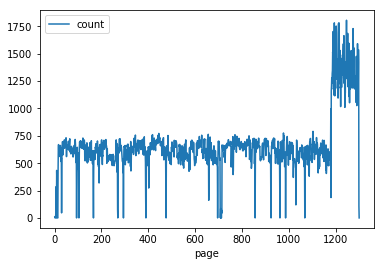

In [123]:
%matplotlib inline
tokens.plot()

How did we get here? When we ran vol.tokens_per_page(), it returned a Pandas DataFrame. This means that after setting tokens, we're no longer working with HTRC-specific code, just book data held in a common and very robust table-like construct from Pandas. tokens.head() used a DataFrame method to look at the first few rows of the dataset, and tokens.plot() uses a method from Pandas to visualize data.

Another DataFrame accessible to us is vol.tokenlist(), which can be called to return section-, part-of-speech-, and word-specific details:

Now let's look at some words deeper into the book: from 1000th to 1100th row, skipping by 15 [1000:1100:15]

In [125]:
tl = vol.tokenlist()
tl[1000:1100:15]

count
page section token       pos       
16   body    experienced VBN      1
             fruitful    JJ       1
             highly      RB       1
             know        VB       1
             much        RB       1
             other       JJ       1
             problems    NNS      2

The Pandas DataFrame type returned by the HTRC Feature Reader is very malleable. To work with the tokenlist that you retrieved earlier, three skills are particularily valuable:

    Selecting subsets by a condition
    Slicing by named row index
    Grouping and aggregating


...

In [93]:
#ADDDDDDD
tl_all = vol.tokenlist(section='all')
chapter_pages = tl_all.loc[(slice(None), slice(None), " "),]
chapter_pages

,,,,count
page,section,token,pos,
9,body,documents,NNS,3
26,body,documents,NNS,1
69,body,documents,NNS,1
237,body,documents,NNS,1
247,body,documents,NNS,5
248,body,documents,NNS,2
249,body,documents,NNS,1
260,body,documents,NNS,1
261,body,documents,NNS,1


AAAAAD

In [94]:
tl_simple = vol.tokenlist(pos=False, pages=False)
# .sample(5) returns five random words from the full result

tl_simple['count'] > 100

section  token      
body     !              False
         !)             False
         !—which        False
         "              False
         ".-            False
         "be            False
         "business      False
         "from          False
         "help          False
         "°1———         False
         $               True
         %               True
         &              False
         '               True
         '(             False
         '50            False
         'C             False
         'Great         False
         'J.            False
         'Robert        False
         'S             False
         '_             False
         'a             False
         'and           False
         'atic          False
         'b             False
         'be            False
         'because       False
         'been          False
         'best          False
                        ...  
         ﬂew            False
         ﬂex-time  

# Relative frequencies

Still looking at one volume, let's start to explore the relative frequencies of tokens within the volume. 

The following cell will display the most common tokens (words or punctuation marks) in a given volume, alongside the number of times they appear. It will also calculate their relative frequencies (found by dividing the number of appearances over the total number of words in the book) and display the results in a DataFrame. The cell may take a few seonds to run because we're looping through every word in the volume!

In [129]:
tokens = vol.tokenlist(pos=False, case=False, pages=False).sort_values('count', ascending=False)

freqs = []
for count in tokens['count']:
    freqs.append(count/sum(tokens['count']))
    
tokens['rel_frequency'] = freqs
tokens

count  rel_frequency
section lowercase                           
body    _               84083       0.097756
        ,               50623       0.058855
        the             41083       0.047764
        .               29028       0.033748
        of              26304       0.030581
        and             21723       0.025256
        to              20327       0.023633
        in              13224       0.015374
        a               10896       0.012668
        that             9212       0.010710
        i                7425       0.008632
        __               7243       0.008421
        for              7210       0.008382
        we               5757       0.006693
        is               5215       0.006063
        on               4830       0.005615
        with             4605       0.005354
        have             4561       0.005303
        our              4527       0.005263
        be               4384       0.005097
        this             4384       0.005097
        you              4261       0.004954
        as               3929       0.004568
        president        3722       0.004327
        it               3536       0.004111
        will             3356       0.003902
        are              3057       0.003554
        from             2737       0.003182
        by               2658       0.003090
        was              2425       0.002819
...                       ...            ...
        furnishing          1       0.000001
        furnishings         1       0.000001
        furor               1       0.000001
        furthered           1       0.000001
        fur—                1       0.000001
        futile              1       0.000001
        future-—all         1       0.000001
        future—             1       0.000001
        future—500,000      1       0.000001
        future—both         1       0.000001
        future—t0           1       0.000001
        future—the          1       0.000001
        future—to           1       0.000001
        future—will         1       0.000001
        f—111s              1       0.000001
        f—15s               1       0.000001
        f—16                1       0.000001
        f——                 1       0.000001
        fﬁdera]             1       0.000001
        g.a.                1       0.000001
        ga.—by              1       0.000001
        gables              1       0.000001
        gabonese            1       0.000001
        gabrielle           1       0.000001
        gainesville         1       0.000001
        galesburg           1       0.000001
        galleries           1       0.000001
        galvanized          1       0.000001
        gambia              1       0.000001
        ﬂying               1       0.000001

[28070 rows x 2 columns]

Now, let's plot the most common tokens from the volume and their frequencies. The following cell outputs a bar plot using the matplotlib library.

Text(0.5, 1.0, 'Common token frequencies in "Public papers ..."')

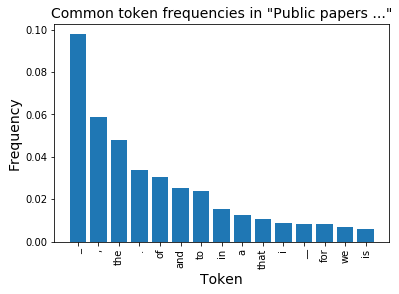

In [130]:
%matplotlib inline
# Build a list of frequencies and a list of tokens.
freqs_1, tokens_1 = [], []
for i in range(15):  # top 8 words
    freqs_1.append(freqs[i])
    tokens_1.append(tokens.index.get_level_values('lowercase')[i])

# Create a range for the x-axis
x_ticks = numpy.arange(len(tokens_1))

# Plot!
plt.bar(x_ticks, freqs_1)
plt.xticks(x_ticks, tokens_1, rotation=90)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Token', fontsize=14)
plt.title('Common token frequencies in "' + vol.title[:14] + '..."', fontsize=14)

As you can see, the most common tokens are mostly punctuation and basic words that don't provide context. Let's see if we can narrow our search to gain some more relevant insight. We can get a list of stopwords from the nltk library. Punctuation is in the string library.

Next we'll import nltk and make the stopwords and punctuation accessible to us. 

In [131]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/efdkoehl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [132]:
from nltk.corpus import stopwords
from string import punctuation

print(stopwords.words('english'))

print()

print(punctuation)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Now that we have a list of words to ignore in our DataFrame, we can make a few tweaks to our plotting cell to remove the punctuation and display only those words not in our stopword list.

Text(0.5, 1.0, 'Common token frequencies in "Public papers ..."')

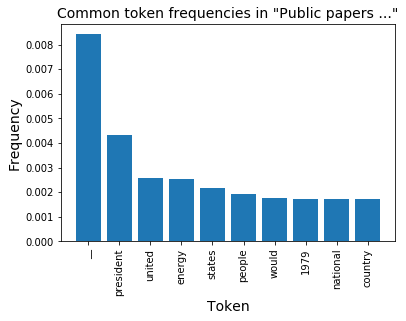

In [133]:
freqs_filtered, tokens_filtered, i = [], [], 0
while len(tokens_filtered) < 10:
    if tokens.index.get_level_values('lowercase')[i] not in stopwords.words('english') + list(punctuation):
        freqs_filtered.append(freqs[i])
        tokens_filtered.append(tokens.index.get_level_values('lowercase')[i])
    i += 1

# Create a range for the x-axis
x_ticks = numpy.arange(len(freqs_filtered))

# Plot!
plt.bar(x_ticks, freqs_filtered)
plt.xticks(x_ticks, tokens_filtered, rotation=90)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Token', fontsize=14)
plt.title('Common token frequencies in "' + vol.title[:14] + '..."', fontsize=14)

# Tokens from all volumes

Now let's see how word frequencies compare across all the books in our samples. 

First we'll set-up a few functions. The first finds the most common noun in a volume, with adjustable parameters for minimum length. The second calculates the relative frequency of a token across the entirety of a volume, saving us the time of doing the calculation like in the above cell. Finally, we'll have a visualization function to create a bar plot of relative frequencies for all volumes in our sample, so that we can easily track how word frequencies differ across titles.


### 1

Let's see what the most common nouns in this work are by word length. To try, add a number to code below.

NOTE: word_length defaults to 2. e.g. most_common_noun(fr_novels.first) returns 'time'.


Try adding a word in the single quotes in the last line below.

In [146]:
def most_common_noun(vol, word_length=2):   
    # Build a table of common nouns
    tokens_1 = vol.tokenlist(pages=False, case=False)
    nouns_only = tokens_1.loc[(slice(None), slice(None), ['NN']),]
    top_nouns = nouns_only.sort_values('count', ascending=False)

    token_index = top_nouns.index.get_level_values('lowercase')
    
    # Choose the first token at least as long as word_length with non-alphabetical characters
    for i in range(max(token_index.shape)):
        if (len(token_index[i]) >= word_length):
            if("'", "!", ",", "?" not in token_index[i]):
                return token_index[i]
    print('There is no noun of this length')
    return None

In [135]:
#add a number to the parenthesis after vol,
most_common_noun(vol, 10)

'government'

### 2
Here, the function frequency() returns a plot of the usage frequencies of the given word across all volumes in the given FeatureReader collection.

NOTE: frequency() returns a dictionary entry of the form {'word': frequency}. e.g. frequency(fr_novels.first(), 'blue') returns {'blue': 0.00012}

Try adding a word in the single quotes in the last line below.

In [138]:
def frequency(vol, word):
    t1 = vol.tokenlist(pages=False, pos=False, case=False)
    token_index = t1[t1.index.get_level_values("lowercase") == word]
    
    if len(token_index['count'])==0:
        return {word: 0}
    
    count = token_index['count'][0]
    freq = count/sum(t1['count'])
    
    return {word: float('%.5f' % freq)}



In [139]:
#add a word in the quotes below
frequency(vol, '')

{'': 0}

### Putting them together

The code below returns a plot of the usage frequencies of the given word across all volumes in the given FeatureReader collection.

Try adding different words to see their relative frequency in our sample.

NOTE: frequencies are given as percentages rather than true ratios.

In [140]:
def frequency_bar_plot(word, fr):
    freqs, titles = [], []
    for vol in fr:
        title = vol.title
        short_title = title[:6] + (title[6:] and '..')
        freqs.append(100*frequency(vol, word)[word])
        titles.append(short_title)
        
    # Format and plot the data
    x_ticks = numpy.arange(len(titles))
    plt.bar(x_ticks, freqs)
    plt.xticks(x_ticks, titles, fontsize=10, rotation=45)
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.title('Frequency of "' + word + '"', fontsize=14)

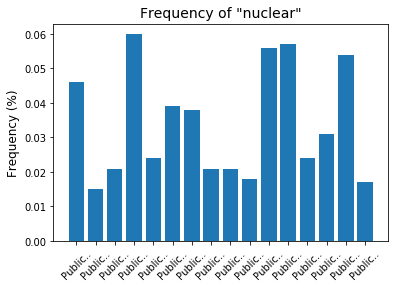

In [143]:
#add a word to between the quotes
frequency_bar_plot('', fr_novels)

Okay, that's interesting, but since all our titles are the same, it's hard to make sense of the results. Let's try plotting relative frequency over time.

The code below returns a DataFrame of relative frequencies, volume years, and page counts, along with a scatter plot.

NOTE: frequencies are given in percentages rather than true ratios.

Try adding a word in the single quotes in the last line below.

In [148]:
def frequency_by_year(query_word, fr):
    volumes = pandas.DataFrame()
    years, page_counts, query_freqs = [], [], []

    for vol in fr:
        years.append(int(vol.year))
        page_counts.append(int(vol.page_count))
        query_freqs.append(100*frequency(vol, query_word)[query_word])
    
    volumes['year'], volumes['pages'], volumes['freq'] = years, page_counts, query_freqs
    volumes = volumes.sort_values('year')
    
    # Set plot dimensions and labels
    scatter_plot = volumes.plot.scatter('year', 'freq', color='black', s=50, fontsize=12)
    plt.ylim(0-numpy.mean(query_freqs), max(query_freqs)+numpy.mean(query_freqs))
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.title('Frequency of "' + query_word + '"', fontsize=14)
    
    return volumes.head(10)

,year,pages,freq
7,1971,1426,0.021
2,1972,1394,0.021
13,1973,1206,0.031
1,1974,892,0.015
12,1974,750,0.024
4,1975,1142,0.024
9,1975,1194,0.018
6,1976,1188,0.038
5,1977,1154,0.039
10,1977,1218,0.056


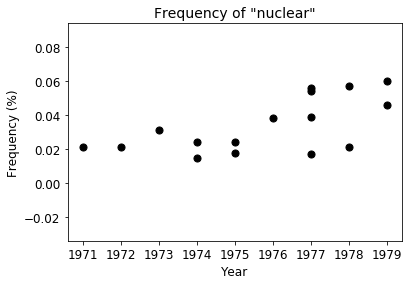

In [150]:
frequency_by_year('nuclear', fr)

### Making use of the structured file

One particularly useful thing about the Extracted Features dataset is that the tokens in the extracted features files are part-of-speech tagged to differentiate homynyms like rose, which can be a name, a noun, and a verb.

For each page, the data is also divided into a header, body, and footer section so that you can systematically remove headers or footers from your data if you choose.

We already saw the possibiity of drilling down to the part-of-speech tag earlier when we found the most frequently-occuring noun in a volume. Below, we will look for one part of speech in just the body of our volumes.

In [151]:
idx = pandas.IndexSlice
vol = next(fr.volumes())
tl = vol.tokenlist(pages=False)
tl.index = tl.index.droplevel(0)
adjectives = tl.loc[idx[:,('JJ')],]
adj_dfs = [adjectives for vol in fr.volumes()]
all_adj = pandas.concat(adj_dfs).groupby(level='token').sum().sort_values('count', ascending=False)[:50]

#prints the Pandas dataframe of all adjectives.
print(all_adj)

               count
token               
_              39136
other          19680
American       12352
new            11264
own             9888
good            9712
great           9664
many            8656
important       7968
last            7200
national        6608
such            6512
public          6080
ﬁrst            6032
economic        5952
international   5440
foreign         5072
nuclear         5024
major           4928
human           4864
same            4784
local           4752
strong          4688
few             4624
private         4432
political       4368
next            4288
possible        4048
special         3744
sure            3696
high            3584
basic           3392
military        3392
natural         3280
common          3120
available       3088
effective       3056
long            3008
much            2928
serious         2784
able            2720
solar           2720
full            2720
small           2656
appropriate     2496
different    